<a href="https://colab.research.google.com/github/mawricio/Skin-cancer-Analyzer/blob/master/How_to_create_a_dashboard_using_Python_Matplotlib_and_Panel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Como criar um painel usando Python (Matplotlib e Painel)
Tabela de Conteúdos

Introdução

1. Criando parcela individual
1.1 Dispersar plot mostrando relação entre 2 características codificadas por alvo (maligno/benigno).
1.2. Gráfico de barras mostrando valor médio de recurso por alvo (maligno/benigno).
1.3. Histograma mostrando distribuição de um único recurso.
2. Mesclagem de Parcelas em Figura Única
3. Criando o Primeiro Painel
4. Organizando componentes do painel
5. Recriar painel com componentes individuais
6. Como manter um servidor funcionando indefinidamente?

Referências

In [28]:
import sklearn
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer

import matplotlib.pyplot as plt

pd.set_option("display.max_columns", 32)

In [29]:
breast_cancer = load_breast_cancer()

print("Feature Names", breast_cancer.feature_names)
print("Target : ", breast_cancer.target_names)
print("Dataset Size : ", breast_cancer.data.shape)

breast_cancer_df = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
breast_cancer_df["Target"] = breast_cancer.target
breast_cancer_df["Target"] = ['Malignant' if typ==0 else 'Benign' for typ in breast_cancer_df["Target"]]
breast_cancer_df.head()

Feature Names ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Target :  ['malignant' 'benign']
Dataset Size :  (569, 30)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,Malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,Malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,Malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,Malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,Malignant


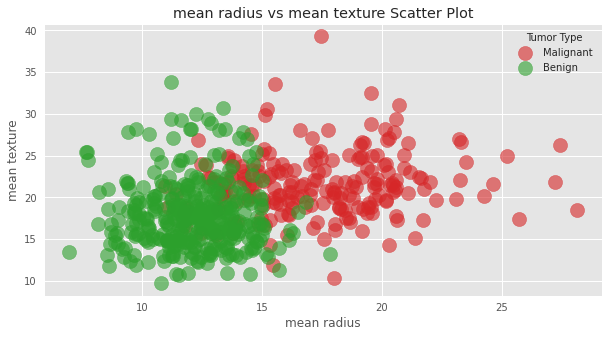

In [30]:
with plt.style.context(("seaborn","ggplot")):
    color = {"Malignant" : "tab:red", "Benign":"tab:green"}
    plt.figure(figsize=(10,5))
    for tumor_typ in breast_cancer_df["Target"].unique():
        plt.scatter(breast_cancer_df[breast_cancer_df["Target"]==tumor_typ]["mean radius"],
                    breast_cancer_df[breast_cancer_df["Target"]==tumor_typ]["mean texture"],
                    c=color[tumor_typ],
                    s=200,
                    alpha=0.6,
                    label=tumor_typ)
    plt.xlabel("mean radius")
    plt.ylabel("mean texture")
    plt.title("mean radius vs mean texture Scatter Plot")
    plt.legend(title="Tumor Type",loc="best")

#Gráfico de barras mostrando valor médio de recurso por alvo (maligno/benigno). 

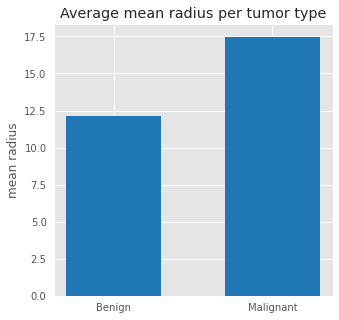

In [31]:
with plt.style.context(("seaborn","ggplot")):
    avg_radius_per_tumor_typ = breast_cancer_df.groupby(by="Target").mean()[["mean radius"]]

    plt.figure(figsize=(5,5))
    plt.bar(avg_radius_per_tumor_typ.index,
            avg_radius_per_tumor_typ["mean radius"],
            color="tab:blue",
            width=0.6)
    plt.ylabel("mean radius")
    plt.title("Average mean radius per tumor type")

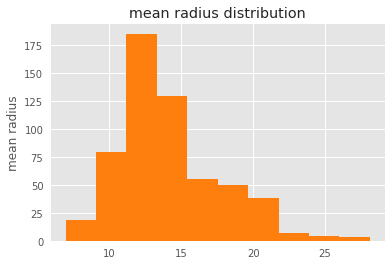

In [32]:
with plt.style.context(("seaborn","ggplot")):
    plt.figure(figsize=(6,4))
    plt.hist(breast_cancer_df["mean radius"], color="tab:orange", )
    plt.ylabel("mean radius")
    plt.title("mean radius distribution")

In [33]:
import matplotlib.gridspec as gridspec

def create_figure(plot1_f1,plot1_f2, plot2_f,plot3_f):
    with plt.style.context(("seaborn","ggplot")):
        fig = plt.figure(constrained_layout=True, figsize=(10,8))
        specs = gridspec.GridSpec(ncols=2, nrows=2, figure=fig) ## Declaring 2x2 figure.

        ax1 = fig.add_subplot(specs[0, :]) ## First Row
        ax2 = fig.add_subplot(specs[1, 0]) ## Second Row First Column
        ax3 = fig.add_subplot(specs[1, 1]) ## Second Row Second Colums

        ## First Graph -  Scatter Plot
        color = {"Malignant" : "tab:red", "Benign":"tab:green"}
        for tumor_typ in breast_cancer_df["Target"].unique():
            ax1.scatter(breast_cancer_df[breast_cancer_df["Target"]==tumor_typ][plot1_f1],
                        breast_cancer_df[breast_cancer_df["Target"]==tumor_typ][plot1_f2],
                        c=color[tumor_typ],
                        s=200,
                        alpha=0.6,
                        label=tumor_typ)
        ax1.set_xlabel(plot1_f1)
        ax1.set_ylabel(plot1_f2)
        ax1.set_title("%s vs %s Scatter Plot"%(plot1_f1, plot1_f2))
        ax1.legend(title="Tumor Type",loc="best")

        ## Second Graph - Bar Chart
        avg_radius_per_tumor_typ = breast_cancer_df.groupby(by="Target").mean()[[plot2_f]]
        ax2.bar(avg_radius_per_tumor_typ.index,
                avg_radius_per_tumor_typ[plot2_f],
                color="tab:blue",
                width=0.6)
        ax2.set_ylabel(plot2_f)
        ax2.set_title("Average %s per tumor type"%(plot2_f))

        ## Third Graph - Histogram
        ax3.hist(breast_cancer_df[plot3_f], color="tab:orange", )
        ax3.set_ylabel(plot3_f)
        ax3.set_title("%s distribution"%(plot3_f))

        plt.close(fig)
        return fig

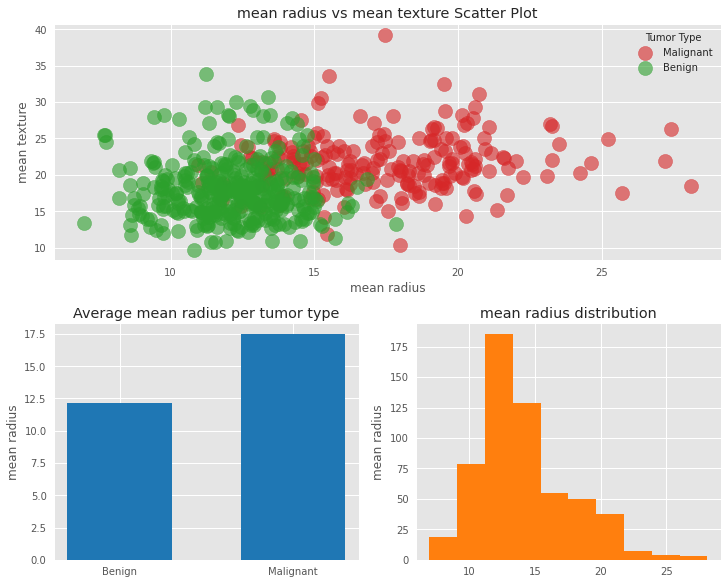

In [34]:
create_figure("mean radius", "mean texture", "mean radius", "mean radius")

#3. Criando o Primeiro Painel 

Depois de passar por uma figura acima, podemos ver claramente os limites se quisermos fazer mais análises. É uma figura estática. Ele não nos permite analisar a relação entre várias características ou ver a distribuição de vários recursos. Teremos que fazer alterações de código sempre que quisermos analisar atributos diferentes.

Mas e se pudermos criar um painel que pode nos permitir selecionar atributos e com base nesse display de seleção gráficos atualizados?

Felizmente, temos biblioteca chamada o que torna nosso trabalho bastante fácil de criar dashboard. Vamos começar a carregar o painel importando-o e, em seguida, chamando-o de método para carregá-lo. Em seguida, criaremos dicionário que terá lista de valores possíveis para todos os parâmetros do método. Podemos então converter nossa função simples em painel, apenas chamando o método sobre ele passando dicionário de todos os valores de parâmetros possíveis.panelextension()create_figure()create_figure()pn.interact()

Column
    [0] Column
        [0] DiscreteSlider(name='plot1_f1', options=['mean radius', ...], value='mean radius')
        [1] DiscreteSlider(name='plot1_f2', options=['mean radius', ...], value='mean radius')
        [2] DiscreteSlider(name='plot2_f', options=['mean radius', ...], value='mean radius')
        [3] DiscreteSlider(name='plot3_f', options=['mean radius', ...], value='mean radius')
    [1] Row
        [0] Matplotlib(Figure, name='interactive00110')
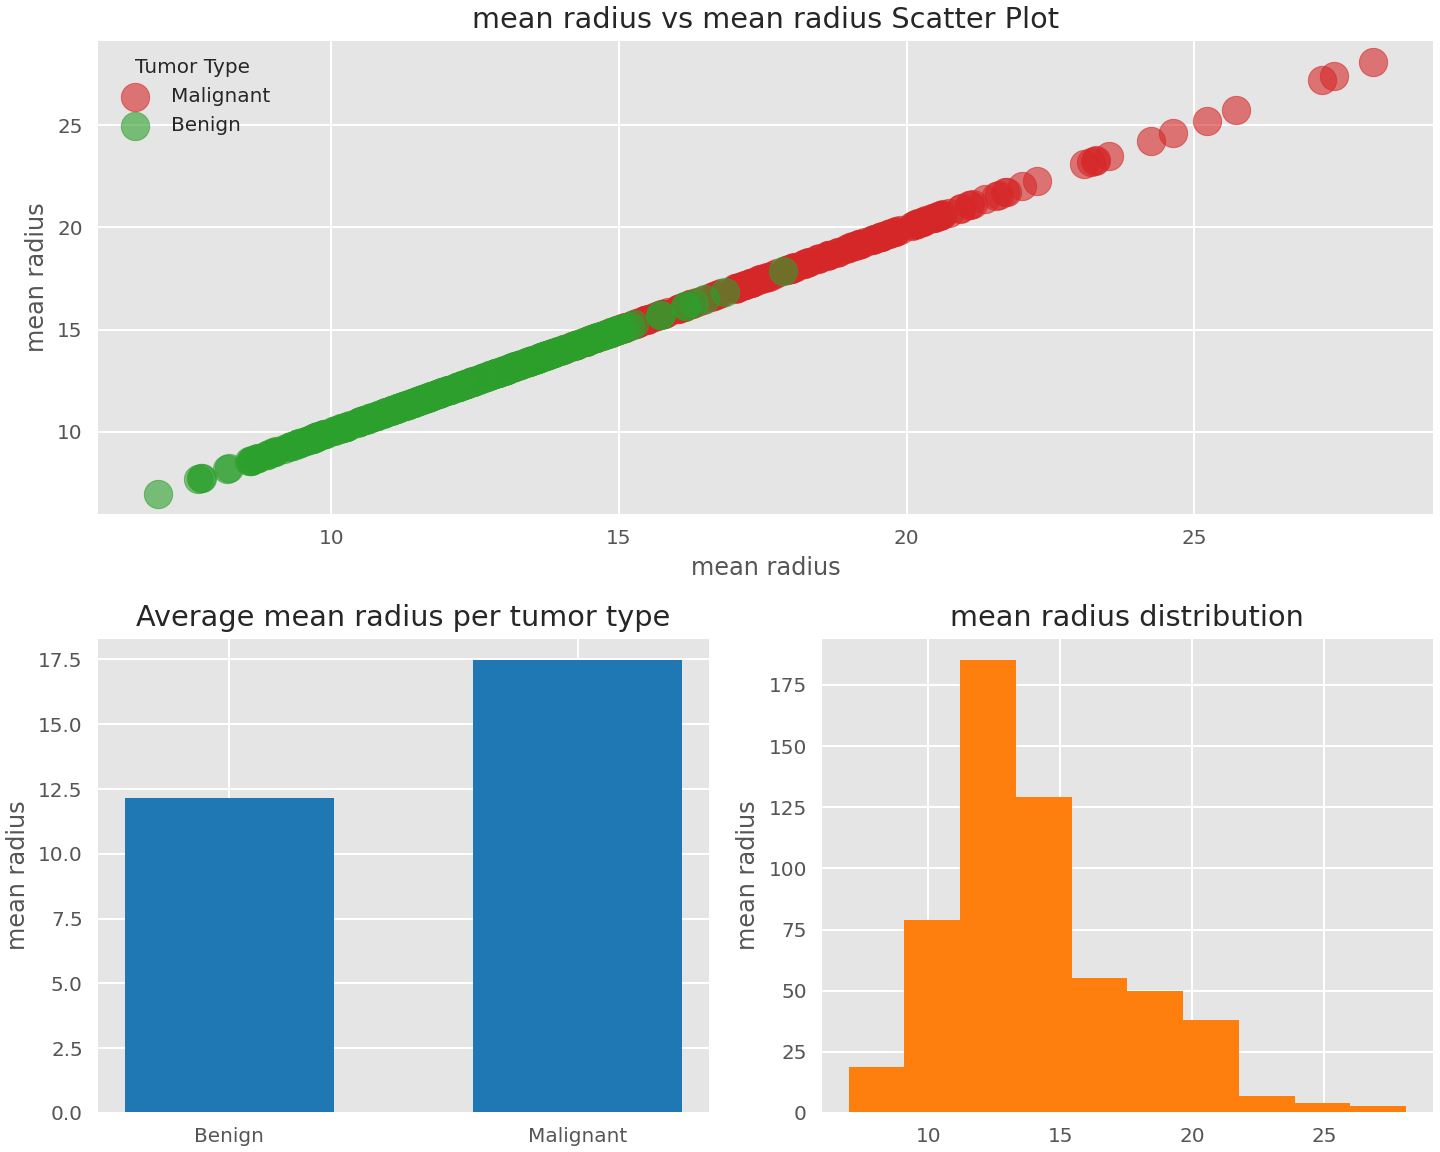

In [24]:
import panel as pn
pn.extension()

kw = dict(plot1_f1=breast_cancer.feature_names,
          plot1_f2=breast_cancer.feature_names,
          plot2_f=breast_cancer.feature_names,
          plot3_f=breast_cancer.feature_names)

dash1 = pn.interact(create_figure, **kw)
dash1

Podemos ver acima que o método está criando controle deslizante para toda lista de valores de parâmetros passados para ele e mantendo todos eles primeiro antes dos gráficos. Agora muda os valores deslizando deslizantes e vê que os gráficos também são atualizados.pn.interact()

#Nota
Por favor, anote que o painel será estático aqui. Será interativo quando você executá-lo em sua máquina. Ele requer corrida back-end para recuperar resultados de acordo com as alterações no valor do widget.

#NOTA:
Por favor, não faça um não que os layouts de método widgets/figuras de acordo com sua escolha que podemos modificar de acordo com nossas necessidades.interact()

#4. Organizando componentes do painel 
Como terminamos com a criação do nosso primeiro painel, gostaríamos de cavar fundo e olhar para um objeto de painel para entendê-lo mais adiante. Vamos imprimir para ver o que ele consiste.dash1

In [25]:
print(dash1)

Column
    [0] Column
        [0] DiscreteSlider(name='plot1_f1', options=['mean radius', ...], value='mean radius')
        [1] DiscreteSlider(name='plot1_f2', options=['mean radius', ...], value='mean radius')
        [2] DiscreteSlider(name='plot2_f', options=['mean radius', ...], value='mean radius')
        [3] DiscreteSlider(name='plot3_f', options=['mean radius', ...], value='mean radius')
    [1] Row
        [0] Matplotlib(Figure, name='interactive00110')


Podemos ver claramente que ele consiste em um componente que consiste em 2 componentes(). Podemos ver que todos os widgets que são controles deslizantes em nosso caso por padrão fazem parte do interior e a Figura faz parte do objeto interno. Podemos imprimir componentes individuais também.ColumnColumn & RowColumnRow

In [26]:
dash1[0]

Column
    [0] DiscreteSlider(name='plot1_f1', options=['mean radius', ...], value='mean radius')
    [1] DiscreteSlider(name='plot1_f2', options=['mean radius', ...], value='mean radius')
    [2] DiscreteSlider(name='plot2_f', options=['mean radius', ...], value='mean radius')
    [3] DiscreteSlider(name='plot3_f', options=['mean radius', ...], value='mean radius')

Row
    [0] Matplotlib(Figure, name='interactive00057')
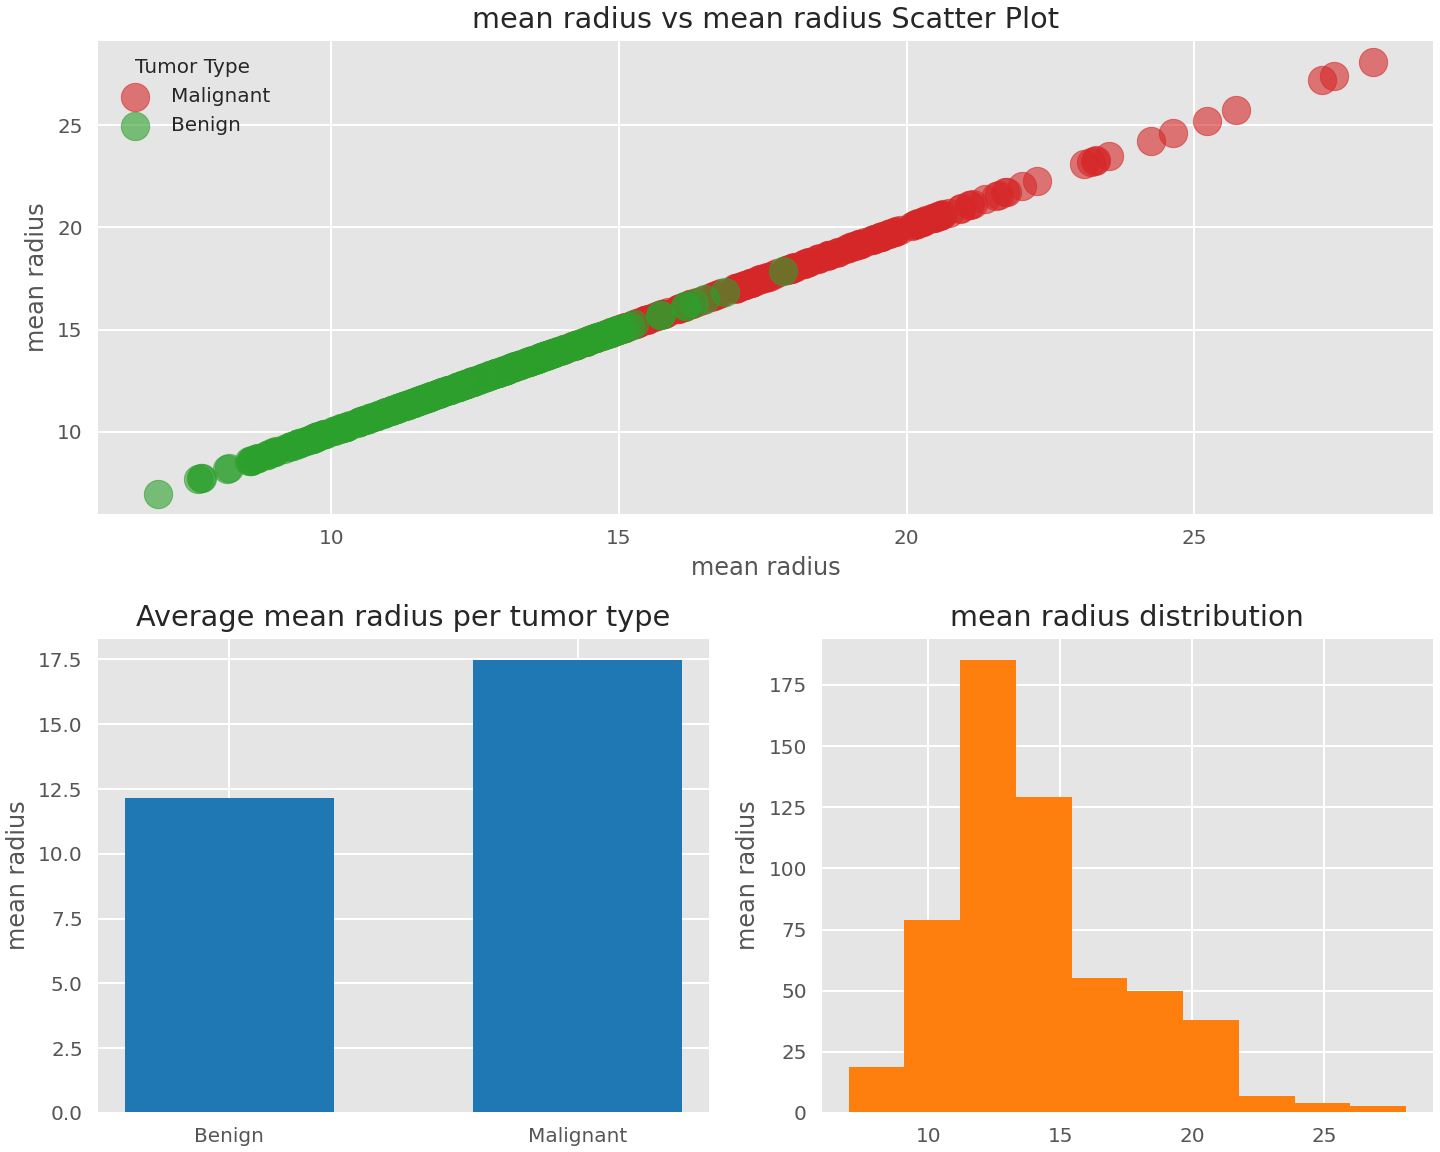

In [23]:
dash1[1]

Column
    [0] Row(align='center')
        [0] DiscreteSlider(name='plot1_f1', options=['mean radius', ...], value='mean symmetry')
        [1] DiscreteSlider(name='plot1_f2', options=['mean radius', ...], value='radius error')
    [1] Row(align='center')
        [0] DiscreteSlider(name='plot2_f', options=['mean radius', ...], value='texture error')
        [1] DiscreteSlider(name='plot3_f', options=['mean radius', ...], value='radius error')
    [2] Row
        [0] Matplotlib(Figure, name='interactive00081')
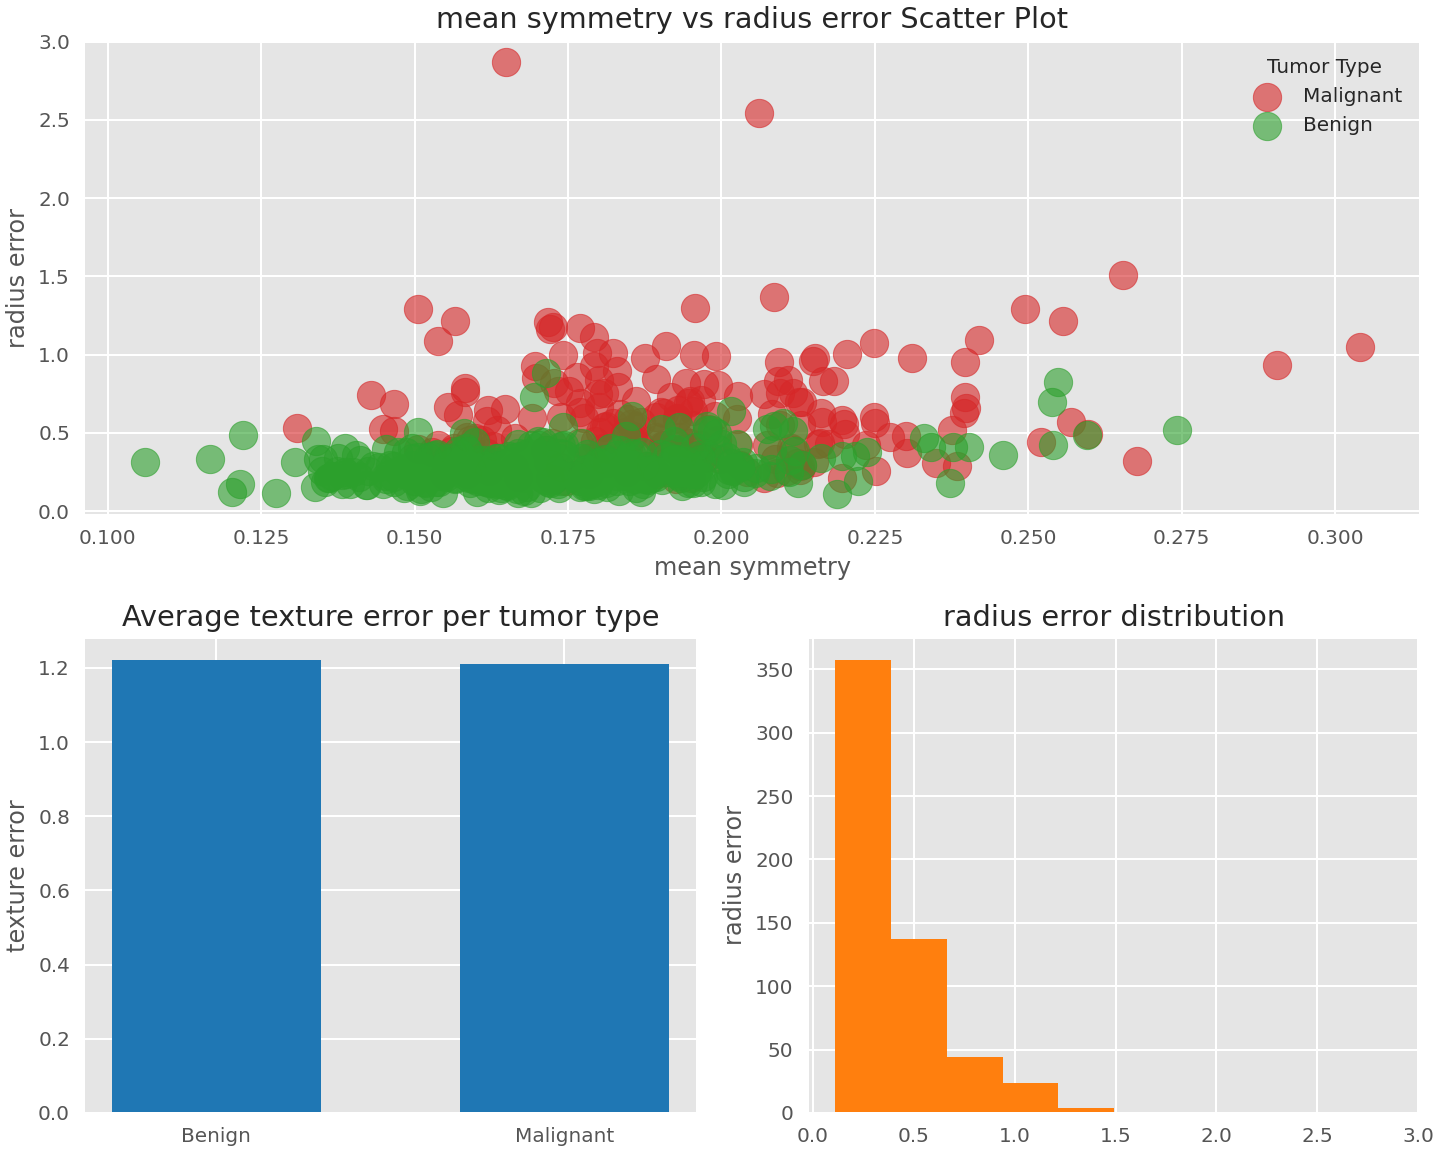

In [41]:
dash2 = pn.Column(
                    pn.Row(dash1[0][0],dash1[0][1], align="center"),
                    pn.Row(dash1[0][2],dash1[0][3], align="center"),
                    dash1[1]
                 )
dash2

#5. Recriar painel com componentes individuais 
Podemos ver claramente no painel acima que os widgets deslizantes não são a escolha ideal para uma lista de valores de string. função por padrão é criar controles deslizantes para a nossa lista de recursos.interact()

E se quisermos modificar isso e querer em vez de controles deslizantes, pois seria uma escolha melhor para a seleção?Dropdown

Podemos fazer isso usando o módulo do painel. fornece-nos uma lista de widgets como controles deslizantes, caixas de rádio, caixas de seleção, controle deslizante inteiro, controle deslizante flutuante, etc. Podemos criar widgets de acordo com nossa escolha e ligá-los ao parâmetro do nosso método.widgetspanel

import panel.widgets as pnw
Começaremos criando 4 dropdowns cada um dos quais terá todos os recursos como opções. Também demos nomes a cada dropdown sobre a qual parâmetro pertence.

f1 = pnw.Select(options=list(breast_cancer.feature_names), name="Scatter Plot Feature 1")
f2 = pnw.Select(options=list(breast_cancer.feature_names), name="Scatter Plot Feature 2")
f3 = pnw.Select(options=list(breast_cancer.feature_names), name="Bar Chart Feature")
f4 = pnw.Select(options=list(breast_cancer.feature_names), name="Histogram Feature")
Podemos vincular os widgets acima mencionados a um parâmetro do nosso método, criando função de invólucro em torno dele e dando-lhe decorador(), como mencionado abaixo. Ele ligará o valor desses widgets com um valor de uma função.@pn.depends

In [42]:
import panel.widgets as pnw

In [43]:
f1 = pnw.Select(options=list(breast_cancer.feature_names), name="Scatter Plot Feature 1")
f2 = pnw.Select(options=list(breast_cancer.feature_names), name="Scatter Plot Feature 2")
f3 = pnw.Select(options=list(breast_cancer.feature_names), name="Bar Chart Feature")
f4 = pnw.Select(options=list(breast_cancer.feature_names), name="Histogram Feature")

In [44]:
@pn.depends(f1.param.value,f2.param.value,f3.param.value,f4.param.value)
def create_dash(f1,f2,f3,f4):
    return create_figure(f1,f2,f3,f4)

Column
    [0] StaticText(align='center', value='<h3>Breast Cancer D...)
    [1] Row(align='center')
        [0] Select(name='Scatter Plot Feature 1', options=['mean radius', ...], value='mean radius')
        [1] Select(name='Scatter Plot Feature 2', options=['mean radius', ...], value='mean radius')
    [2] Row(align='center')
        [0] Select(name='Bar Chart Feature', options=['mean radius', ...], value='mean radius')
        [1] Select(name='Histogram Feature', options=['mean radius', ...], value='mean radius')
    [3] Row
        [0] ParamFunction(function)
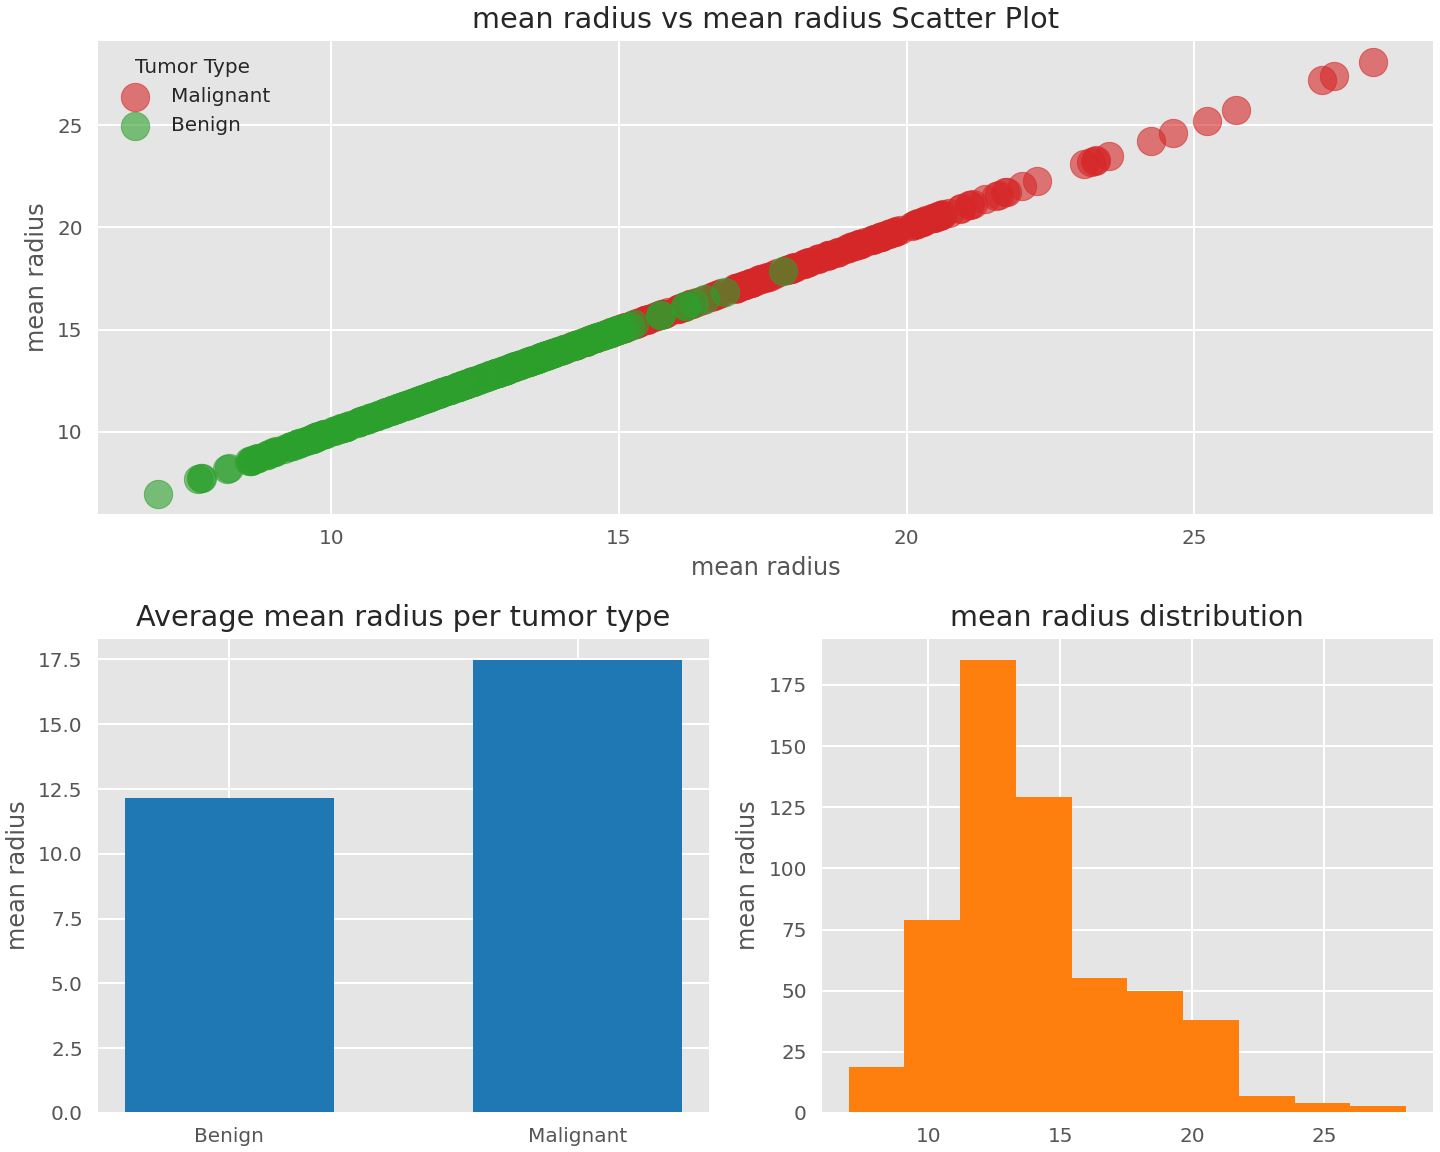

In [45]:
heading = "<h3>Breast Cancer Data Analysis Dashboard</h3>\nPlease feel free to try various combinations of parameters to analyze results from different angles"
text = pnw.StaticText(value=heading, align="center")

dash3 = pn.Column(
                    text,
                    pn.Row(f1,f2, align="center"),
                    pn.Row(f3,f4, align="center"),
                    pn.Row(create_dash)
                )
dash3

In [46]:
print(dash3)

Column
    [0] StaticText(align='center', value='<h3>Breast Cancer D...)
    [1] Row(align='center')
        [0] Select(name='Scatter Plot Feature 1', options=['mean radius', ...], value='mean radius')
        [1] Select(name='Scatter Plot Feature 2', options=['mean radius', ...], value='mean radius')
    [2] Row(align='center')
        [0] Select(name='Bar Chart Feature', options=['mean radius', ...], value='mean radius')
        [1] Select(name='Histogram Feature', options=['mean radius', ...], value='mean radius')
    [3] Row
        [0] ParamFunction(function)


In [47]:
dash3.show()

Launching server at http://localhost:45677


#6. Como manter um servidor funcionando indefinidamente? 
Podemos declarar o objeto do painel como servável chamando o método nele que o marcará para servir. Podemos então ir para uma linha de comando e executar um notebook usando o comando que vai continuar executando-o indefinidamente.servable()panel

panel serve --show dash.ipynb

In [51]:
pip install selenium

     |████████████████████████████████| 911kB 7.9MB/s 


Column
    [0] StaticText(align='center', value='<h3>Breast Cancer D...)
    [1] Row(align='center')
        [0] Select(name='Scatter Plot Feature 1', options=['mean radius', ...], value='mean radius')
        [1] Select(name='Scatter Plot Feature 2', options=['mean radius', ...], value='mean radius')
    [2] Row(align='center')
        [0] Select(name='Bar Chart Feature', options=['mean radius', ...], value='mean radius')
        [1] Select(name='Histogram Feature', options=['mean radius', ...], value='mean radius')
    [3] Row
        [0] ParamFunction(function)
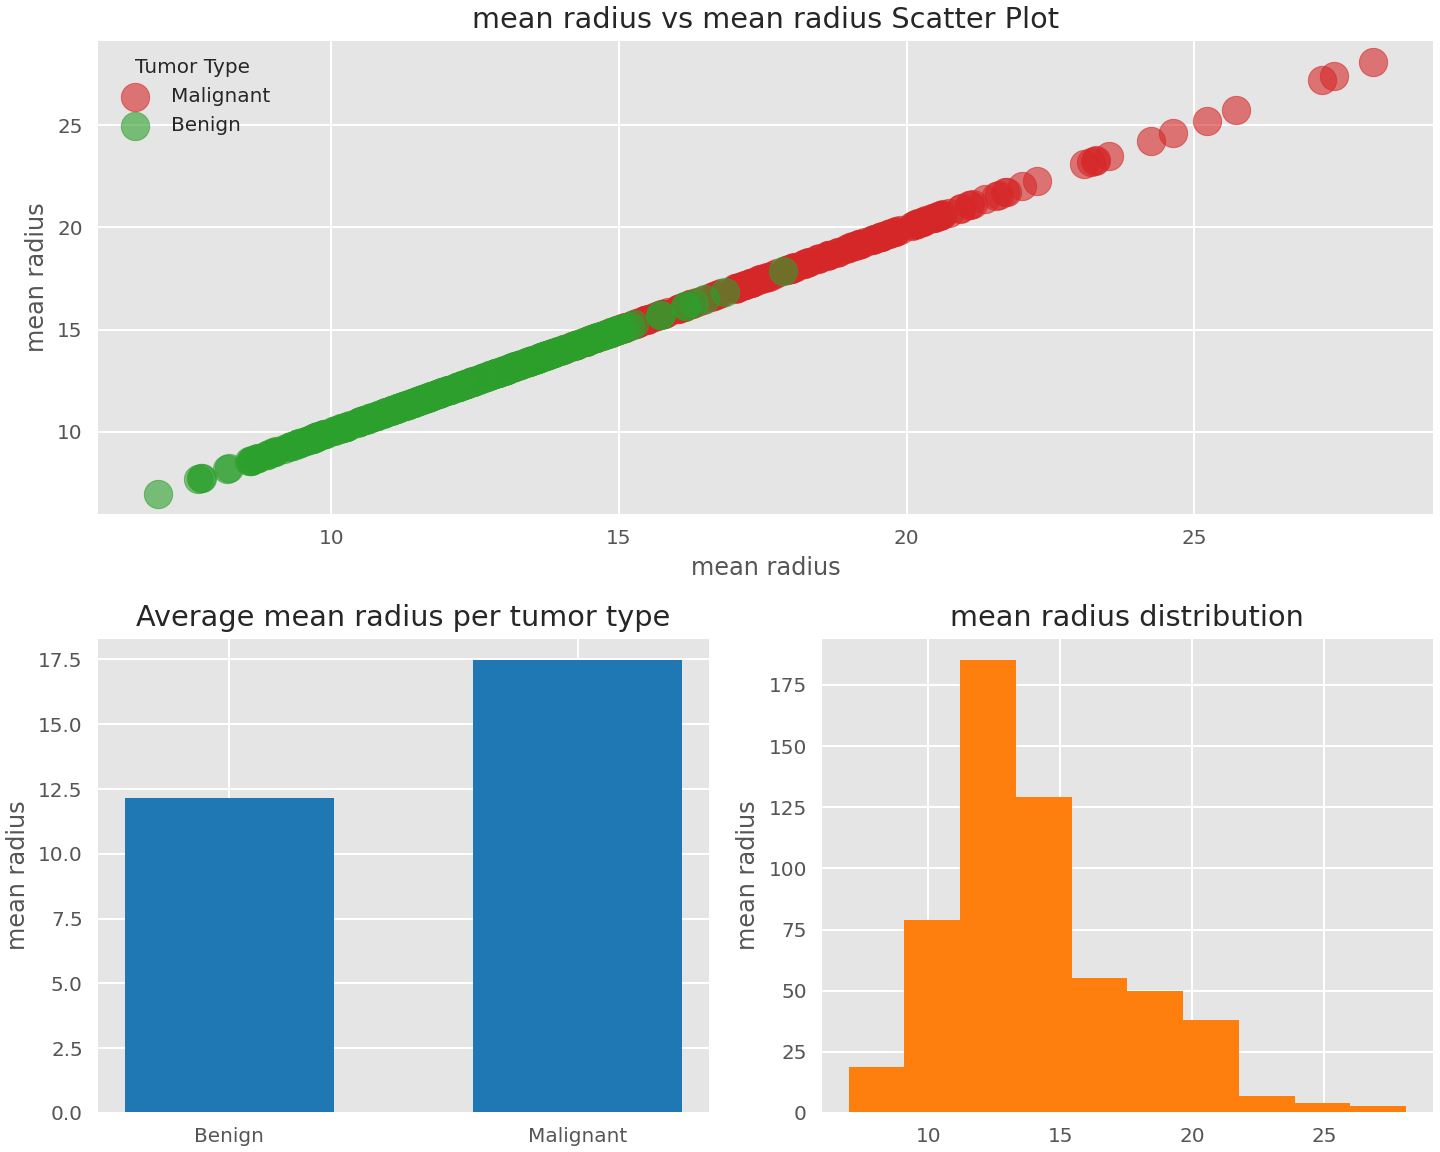

In [52]:
dash3.servable()

In [53]:
dash3.save("dash.html")

You are generating standalone HTML/JS output, but trying to use real Python
callbacks (i.e. with on_change or on_event). This combination cannot work.

Only JavaScript callbacks may be used with standalone output. For more
information on JavaScript callbacks with Bokeh, see:

    https://docs.bokeh.org/en/latest/docs/user_guide/interaction/callbacks.html

Alternatively, to use real Python callbacks, a Bokeh server application may
be used. For more information on building and running Bokeh applications, see:

    https://docs.bokeh.org/en/latest/docs/user_guide/server.html



In [54]:
dash3.save("dash.png")

RuntimeError: ignored